In [1]:
import imageio
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm

# Project source files
from utils import *
from ols import *
from ridge import *
from logistic import *
from neural import *
from FeedForwardNeuralNetwork import *
from StochasticGradientDescent import *

In [22]:
# Setting up pyplot runtime configuration

from matplotlib.ticker import MaxNLocator

SMALL = 12
MEDIUM = 16
LARGE = 20
THICK = 4
THIN = 3
WIDE_FIG = (20,6)
SMALL_FIG = (6,6)
OPACITY = .25


plt.style.context('fivethirtyeight')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='black', axisbelow=True, grid=True)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('lines', linewidth=THICK)

plt.rc('font', size=SMALL, weight='bold')          # default text sizes
plt.rc('axes', titlesize=MEDIUM)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM)    # legend fontsize
plt.rc('figure', titlesize=LARGE)  # fontsize of the figure title

COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k
<ipython-input-23-681b4097d251>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/i**k


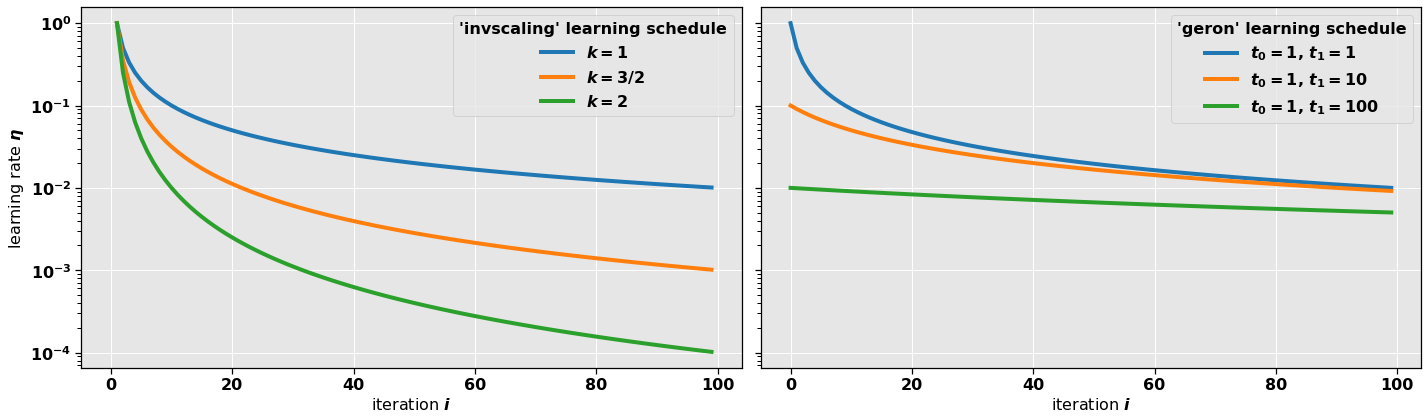

In [23]:
def invscaling(i, k):
    return 1/i**k

def geron(i, t1):
    return 1/(i + t1)

x = np.arange(100)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=WIDE_FIG)
ax = axes[0]
ax.plot(x, invscaling(x, 1))
ax.plot(x, invscaling(x, 3/2))
ax.plot(x, invscaling(x, 2))
ax.legend(['$k=1$', '$k=3/2$', '$k=2$'], title=f"'invscaling' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[1]
ax.plot(x, geron(x, 1))
ax.plot(x, geron(x, 10))
ax.plot(x, geron(x, 100))
ax.legend(['$t_0=1$, $t_1=1$', '$t_0=1$, $t_1=10$', '$t_0=1$, $t_1=100$'], title=f"'geron' learning schedule", fontsize=MEDIUM, title_fontsize=MEDIUM, loc='upper right')
ax.set_yscale('log')

ax = axes[0]
ax.set_ylabel('learning rate $\eta$')
ax.set_xlabel('iteration $i$')

ax = axes[1]
ax.set_xlabel('iteration $i$')


plt.tight_layout()
plt.show()